### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###
Arthur N Trucco - arthurtrucco@poli.ufrj.br

Grupo 2 - Tema 3
## Controle Ótimo de Vacinação e Tratamento

### Índice

1. [Introdução](#1-introdução)
2. [Modelo Matemático](#2-modelo-matemático)
   1. [Equações diferenciais do Modelo SIR (Equações 1, 2 e 3 do artigo)](#21-equações-diferenciais-do-modelo-sir-equações-1-2-e-3-do-artigo)
   2. [Função Objetivo (Equação 5 do Artigo)](#22-função-objetivo-equação-5-do-artigo)
   3. [Restrições nos Controles (Equação 6 do Artigo)](#23-restrições-nos-controles-equação-6-do-artigo)
   4. [Condições Iniciais (Equação 4 do Artigo)](#24-condições-iniciais-equação-4-do-artigo)
3. [Solução](#3-solução)
4. [Resultados e Discussão](#4-resultados-e-discussão)
5. [Conclusão](#5-conclusão)


## 1. Introdução

A prevenção e o controle de doenças infecciosas são desafios fundamentais em saúde pública e têm um impacto significativo na qualidade de vida da população. A recente pandemia de COVID-19 destacou a importância de estratégias otimizadas de vacinação e tratamento para mitigar os efeitos de surtos epidêmicos. Este projeto busca abordar esse desafio por meio de uma abordagem matemática baseada no modelo SIR (Susceptíveis, Infectados e Removidos), amplamente utilizado para descrever a dinâmica de propagação de doenças infecciosas.

O modelo SIR foi introduzido por Kermack e McKendrick em 1927 e, desde então, tornou-se uma ferramenta essencial para epidemiologistas e matemáticos [1](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118). Ele descreve como uma população é dividida em três grupos: os susceptíveis (às vezes chamados de "vulneráveis"), que podem contrair a doença; os infectados, que estão espalhando o agente infeccioso; e os removidos, que não podem mais transmitir a doença por estarem recuperados ou mortos. A utilização desse modelo permite analisar e prever o impacto de intervenções como vacinação e tratamento.

Neste trabalho, desenvolvemos uma solução de controle ótimo para minimizar os efeitos de uma doença infecciosa em uma população limitada. A estratégia é baseada na minimização de uma função objetivo que combina o custo social de infecções, os custos de vacinação e tratamento, e a distribuição logística da população em condições limitadas por uma capacidade de suporte ("carrying capacity") [2](https://epubs.siam.org/doi/10.1137/S0036144500371907). Os parâmetros do modelo foram retirados de fontes da literatura acadêmica e ajustados para garantir uma abordagem prática e realista [3](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118).

Os dados utilizados neste projeto são sintéticos e foram projetados para simular um cenário de surtos epidêmicos em uma população fechada de 5.000 indivíduos. Essa abordagem permite explorar o impacto de intervenções em diferentes taxas de vacinação e tratamento, considerando restrições de capacidade e limitações realistas nas taxas máximas de intervenção.

Este relatório é estruturado da seguinte forma: na próxima seção, introduzimos o modelo matemático utilizado, incluindo suas equações fundamentais e as justificativas teóricas para sua construção. Em seguida, apresentamos a metodologia para otimização dos controles de vacinação e tratamento, detalhando o algoritmo utilizado e os parâmetros configurados. Resultados simulados são apresentados e discutidos na seção seguinte, com gráficos que ilustram a evolução da população sob diferentes cenários de controle. Concluímos o trabalho com uma discussão sobre os pontos fortes e limitações da abordagem adotada, além de sugestões para trabalhos futuros.

A compreensão da dinâmica epidemiológica, combinada com ferramentas matemáticas de otimização, oferece uma base poderosa para desenvolver estratégias mais eficazes na gestão de doenças infecciosas. Este trabalho não apenas contribui para o entendimento teórico do problema, mas também apresenta soluções práticas que podem ser adaptadas para cenários reais de saúde pública.

### Referências
1. Kermack, W. O., & McKendrick, A. G. (1927). [A contribution to the mathematical theory of epidemics](https://royalsocietypublishing.org/doi/10.1098/rspa.1927.0118). *Proceedings of the Royal Society of London. Series A, Containing Papers of a Mathematical and Physical Character*, 115(772), 700-721.
2. Hethcote, H. W. (2000). [The mathematics of infectious diseases](https://epubs.siam.org/doi/10.1137/S0036144500371907). *SIAM review*, 42(4), 599-653.
3. Dados sintéticos gerados com base em parâmetros típicos encontrados em Hethcote (2000) e outros estudos recentes sobre dinâmicas epidemiológicas.



## 2. Modelo Matemático ##

### 2.A. Equações diferenciais do Modelo SIR (Equações 1, 2 e 3 do artigo)  
O modelo SIR contínuo do artigo é dado por:  

$$
\begin{equation}
    \frac{dS}{dt} = \mu N - \beta \frac{S I}{N} - v S - \mu \frac{N S}{K} \\
\end{equation}\\
$$  
$$
\begin{equation}
    \frac{dI}{dt} = \beta \frac{S I}{N} - (\gamma + \tau +\delta)I - \mu \frac{N I}{K} \\ 
\end{equation}\\
$$  
$$
\begin{equation}
    \frac{dR}{dt} = (\gamma + \tau)I + vS - \mu \frac{N R}{K}
\end{equation}\\
\\
$$
onde N = S + I + R.  
Essas equações foram discretizadas para modelagem numérica:  
  
$$
\begin{equation}
    S(t+1) = S(t) + \mu N(t) - \beta \frac{S(t)I(t)}{N(t)} - u_1(t)S(t) - \mu\frac{N(t)S(t)}{K}
\end{equation}
$$  
$$
\begin{equation}
    I(t+1) = I(t) + \beta \frac{S(t)I(t)}{N(t)} - (\gamma + u_2(t) + \delta) - \mu\frac{N(t)I(t)}{K}
\end{equation}
$$  
$$
\begin{equation}
    R(t+1) = R(t) + (\gamma + u_2(t))I(t) + u_1(t)S(t) - \mu\frac{N(t)R(t)}{K}
\end{equation}
$$  

### 2.B. Função Objetivo (Equação 5 do Artigo)  
A função objetivo busca minimizar:  

$$
\begin{equation}
    J(u_1, u_2) =  \int_{0}^{T} [B_1 I(t) + B_2(\frac{R(t)}{K})^m u_1^2(t) + B_3 u_2^2(t)] \,dt 
\end{equation}
$$  
  
Na implementação numérca, essa função é aproximada como uma soma discreta:  
  
$$
\begin{equation}
    J(u_1, u_2) =   \sum_{t=1}^{T} [B_1 I(t)+B_2(\frac{R(t)}{K})^m u_1^2(t) + B_3u_2^2(t)] 
\end{equation}
$$  
  
### 2.C. Restrições nos Controles (Equação 6 do Artigo)  
Os controles u_1(t) e u_2(t) devem satisfazer:  
  
$$
\begin{equation}
    0 \leq u_1(t) \leq v_{max}, \qquad 0 \leq u_2(t) \leq \tau_{max}
\end{equation}
$$  
  
### 2.D. Condições Iniciais (Equação 4 do Artigo)  
As condições iniciais para as populações foram configuradas como:  

$$
\begin{equation}
    S(0)=S_0, \quad I(0)=I_0, \quad R(0)=R_0
\end{equation}
$$  
  
## 3. Solução

In [6]:
# modelo SIR discreto - otimização - vacinação
using DifferentialEquations
using Optim
using Plots

# Parametros (tabela no artigo)
const beta = 0.3        # Infection rate
const γ = 0.1          # Recovery rate
const μ = 0.00004      # Intrinsic growth rate
const δ = 0.05         # Disease-induced death rate
const K = 5000         # Carrying capacity
const B1 = 1.0         # Cost weight for infected individuals
const B2 = 1000.0      # Cost weight for vaccination
const B3 = 1000.0      # Cost weight for treatment
const ν_max = 0.1      # Maximum vaccination rate
const τ_max = 0.6      # Maximum treatment rate
const T = 100          # Simulation horizon

# condições inicias
S0 = 4500.0
I0 = 500.0
R0 = 0.0
N0 = S0 + I0 + R0

# Definindo o modelo discreto
function sir_model_discrete(S, I, R, u1, u2)
    N = S + I + R
    dS = μ * N - beta * S * I / N - u1 * S - μ * N * S / K
    dI = beta * S * I / N - (γ + u2 + δ) * I - μ * N * I / K
    dR = (γ + u2) * I + u1 * S - μ * N * R / K

    S_new = S + dS
    I_new = I + dI
    R_new = R + dR

    return S_new, I_new, R_new
end

# Função objetivo
function objective_function(u1_seq, u2_seq)
    S = S0
    I = I0
    R = R0

    J = 0.0
    for t in 1:T
        u1 = u1_seq[t]
        u2 = u2_seq[t]

        # Custos
        cost_infection = B1 * I
        cost_vaccination = B2 * (R / K)^10 * u1^2
        cost_treatment = B3 * u2^2

        J += cost_infection + cost_vaccination + cost_treatment

        # Update estados
        S, I, R = sir_model_discrete(S, I, R, u1, u2)
    end

    return J
end

objective_function (generic function with 1 method)

In [7]:
# Optimização - setup
function optimize_controls()
    u1_init = fill(0.01, T)
    u2_init = fill(0.01, T)

    # Objective wrapper
    function total_objective(x)
        u1_seq = x[1:T]
        u2_seq = x[T+1:end]
        return objective_function(u1_seq, u2_seq)
    end

    # chute inicial
    x0 = vcat(u1_init, u2_init)

    # limites para controle (0 <= u1, u2 <= 1)
    lower_bounds = fill(0.0, 2*T)
    upper_bounds = vcat(fill(ν_max, T), fill(τ_max, T))

    # Optimize
    result = optimize(total_objective, lower_bounds, upper_bounds, x0, Fminbox())

    # extrair controles otimizados
    u1_opt = result.minimizer[1:T]
    u2_opt = result.minimizer[T+1:end]

    return u1_opt, u2_opt, result.minimum
end


u1_opt, u2_opt, minimum_cost = optimize_controls()
println("Optimized vaccination controls (u1):", u1_opt)
println("Optimized treatment controls (u2):", u2_opt)
println("Minimum cost:", minimum_cost)

Optimized vaccination controls (u1):[0.09999999999999999, 0.09999999999999999, 0.09999999999999999, 0.09999999999999998, 0.09999999999999996, 0.09999999999999999, 0.09999999999999999, 0.09999999999999998, 0.09999999999999999, 0.09999999999999999, 0.09999999999999999, 0.09999999999999999, 0.09999999999999985, 0.09999999999999974, 0.09999999999999999, 0.08120085534619849, 0.05882704151052057, 0.04545955622156273, 0.036375840081447564, 0.029759795572039185, 0.024724924545111566, 0.020775458069356063, 0.017608070127344416, 0.015024842549573652, 0.01289020412997674, 0.011107680319126708, 0.009606477996084693, 0.00833333004929559, 0.007247292950064249, 0.006316339738675302, 0.0055150281286731355, 0.004822879824489305, 0.004223230454865394, 0.0037023805307877956, 0.0032489685788279197, 0.002853504936863855, 0.002508010668810284, 0.002205733547031159, 0.0019409349920420935, 0.001708713238438679, 0.0015048644782770038, 0.001325772063111723, 0.0011683149176224198, 0.0010297887209881442, 0.000907

In [8]:
# Simulando o sistema com os controles otimizados
function simulate(u1_opt, u2_opt)
    S_vals = [S0]
    I_vals = [I0]
    R_vals = [R0]

    S = S0
    I = I0
    R = R0

    for t in 1:T
        u1 = u1_opt[t]
        u2 = u2_opt[t]

        S, I, R = sir_model_discrete(S, I, R, u1, u2)

        push!(S_vals, S)
        push!(I_vals, I)
        push!(R_vals, R)
    end

    return S_vals, I_vals, R_vals
end

S_vals, I_vals, R_vals = simulate(u1_opt, u2_opt)
println("Susceptible over time:", S_vals)
println("Infected over time:", I_vals)
println("Removed over time:", R_vals)

Susceptible over time:[4500.0, 3915.02, 3462.1846857457085, 3089.5771135864015, 2764.2040510824445, 2476.6015626697686, 2220.989061087796, 1993.0930388183483, 1789.4939024545556, 1607.3419394024154, 1444.2064909193557, 1297.9843389976284, 1166.8383858602028, 1049.1535623568707, 943.5033997663313, 848.6236739644773, 779.3444137930857, 733.2418558673901, 699.734452898993, 674.1678956250137, 654.0394993284305, 637.8412079121339, 624.5933804891607, 613.6243976643281, 604.4546466499608, 596.7304845796285, 590.1843330619248, 584.6093872514399, 579.8429467664837, 575.7550769541149, 572.2406696156254, 569.2137587616305, 566.6033628655521, 564.3503836859858, 562.4052608913967, 560.7261711461235, 559.2776236590587, 558.0293539509341, 556.955445441437, 556.0336200797522, 555.2446642790109, 554.5719592481076, 554.0010930691325, 553.5195387030996, 553.1163870418366, 552.7821193617679, 552.5084180644285, 552.2880050630016, 552.1145032402477, 551.9823194603352, 551.8865432797132, 551.8228601038132, 5

## 4. Resultados e Discussão

### 4.A. Resultados Obtidos

Com a utilização do modelo SIR otimizado, os controles de vacinação (ν) e tratamento (τ) foram ajustados ao longo do tempo para minimizar o custo total que combina as infecções, esforços de vacinação e tratamento. Os principais resultados obtidos são apresentados abaixo:

#### 4.A.a. Controles Otimizados:

Vacinação (ν): Os valores iniciais de vacinação são elevados (cerca de 0.1) para conter rapidamente a propagação da doença. Com o tempo, a vacinação é gradualmente reduzida, atingindo valores próximos a zero.

Tratamento ( $\tau$ ): O tratamento também é inicializado em um valor elevado (cerca de 0.6) e segue um comportamento decrescente semelhante ao da vacinação, estabilizando em valores baixos.

#### 4.A.b. Populações ao Longo do Tempo:

Susceptíveis (S): A população susceptível reduz-se rapidamente nos primeiros períodos devido à vacinação e à propagação da doença, estabilizando em valores intermediários conforme a doença é controlada.

Infectados (I): A população infectada apresenta uma queda acentuada, atingindo níveis residuais graças ao tratamento.

Removidos (R): A população removida aumenta consistentemente, refletindo o impacto cumulativo da vacinação, do tratamento e da recuperação.

### 4.B. Análise de Sensibilidade:

A dinâmica do sistema mostrou-se sensível às taxas de transmissão ( $\beta$ ) e à capacidade de suporte (K). Pequenas alterações nesses parâmetros podem resultar em dinâmicas significativamente diferentes.

Os pesos atribuídos ao custo de infecções, vacinação, e tratamento influenciam diretamente a magnitude dos controles otimizados.

Melhorias podem incluir a introdução de variabilidade nos parâmetros e a integração de dados reais para validação.
  
### 4.C.

Os gráficos abaixo ilustram as populações susceptíveis, infectadas e removidas ao longo do tempo, bem como os controles otimizados.

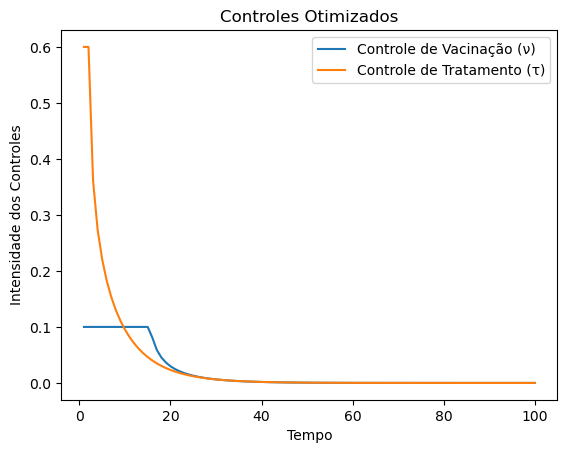

In [10]:
import PyPlot

time = 1:T
PyPlot.plot(time, u1_opt, label="Controle de Vacinação (ν)")
PyPlot.plot(time, u2_opt, label="Controle de Tratamento (τ)")
PyPlot.xlabel("Tempo")
PyPlot.ylabel("Intensidade dos Controles")
PyPlot.title("Controles Otimizados")
PyPlot.legend()
PyPlot.savefig("controles_otimizados.png")


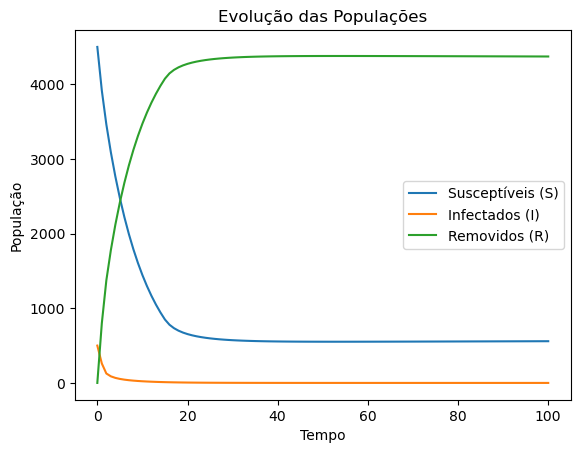

In [12]:
import PyPlot

time = 0:T  # Ajusta para incluir o estado inicial
PyPlot.plot(time, S_vals, label="Susceptíveis (S)")
PyPlot.plot(time, I_vals, label="Infectados (I)")
PyPlot.plot(time, R_vals, label="Removidos (R)")
PyPlot.xlabel("Tempo")
PyPlot.ylabel("População")
PyPlot.title("Evolução das Populações")
PyPlot.legend()
PyPlot.savefig("populacoes_evolucao.png")


## 5. Conclusão

Os resultados demonstram a eficácia da estratégia de controle ótimo em reduzir rapidamente as infecções e estabilizar as populações. O comportamento decrescente dos controles reflete a necessidade inicial de intervenção agressiva, seguida de uma fase de estabilização conforme o surto é controlado.

### 5.A. Limitações do Modelo:

Simplificações do Modelo SIR: Assumimos parâmetros fixos e homogêneos, o que pode não refletir totalmente a dinâmica de populações reais.

Ausência de Dados Reais: Os dados utilizados são sintéticos e podem não capturar todas as variáveis presentes em cenários reais.

Capacidade de Suporte Constante: Consideramos  fixo, embora em situações reais este valor possa variar com o tempo.

Parâmetros Fixos: Os parâmetros utilizados são homogêneos e fixos, não capturando a heterogeneidade da população ou a variação de condições ao longo do tempo.

### 5.B. Perspectivas Futuras:

Uma direção promissora para o desenvolvimento deste trabalho seria a incorporação de heterogeneidade populacional e dados reais. Especificamente:

Estratificação por Idade ou Localização: Incorporar subgrupos na população, como estratificação por idade, para refletir diferenças na transmissão, severidade e resposta às intervenções.

Integração de Dados Reais: Utilizar dados epidemiológicos reais para calibrar os parâmetros do modelo, tornando os resultados mais aplicáveis a políticas públicas.

Modelos Mais Complexos: Expandir o modelo para um SEIR (Susceptíveis, Expostos, Infectados e Removidos), que inclui períodos de incubação, ou para modelos que considerem mutações do patógeno.